In [1]:
%matplotlib inline
import matplotlib.pylab
import pandas as pd
import numpy as np

In [2]:
df = pd.Series(np.random.randn(600), index = pd.date_range('7/1/2020', periods = 600, freq = 'D' ))

In [3]:
df.head()

2020-07-01    0.732282
2020-07-02    0.230085
2020-07-03   -1.141040
2020-07-04    1.511357
2020-07-05    0.079855
Freq: D, dtype: float64

In [4]:
#Moving windows function: rolling
r = df.rolling(window = 10)
r

Rolling [window=10,center=False,axis=0]

In [5]:
#r.max, r.median, r.std, r.skew, r.sum, r.var
print(r.mean())

#only length = 10 windows can be calculated. So the first mean start at 10 day

2020-07-01         NaN
2020-07-02         NaN
2020-07-03         NaN
2020-07-04         NaN
2020-07-05         NaN
                ...   
2022-02-16    0.041828
2022-02-17   -0.015716
2022-02-18    0.255888
2022-02-19    0.388392
2022-02-20    0.226555
Freq: D, Length: 600, dtype: float64


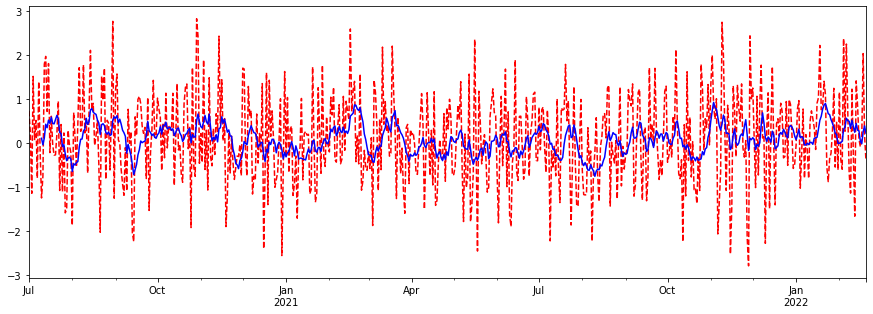

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (15,5))

df.plot(style='r--')
df.rolling(window=10).mean().plot(style='b')

## Melbourne Tempature Project - Times Series Analysis

In [7]:
temp = pd.read_csv("melbourne_temp_1.csv")
temp.head()

,Date,daily_temp
0,1/1/81,20.7
1,1/2/81,17.9
2,1/3/81,18.8
3,1/4/81,14.6
4,1/5/81,15.8


In [8]:
# temp['new_date'] = pd.date_range(start='1/1/1981', end='12/31/1990', freq='D')

In [9]:
temp['daily_temp'] = pd.to_numeric(temp['daily_temp'], errors='coerce')

In [10]:
# Check missing value
temp.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        3650 non-null   object 
 1   daily_temp  3647 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [11]:
#Covert to pandas dataframe's datetime
temp['Date'] = pd.to_datetime(temp['Date'])
temp = temp.set_index('Date')

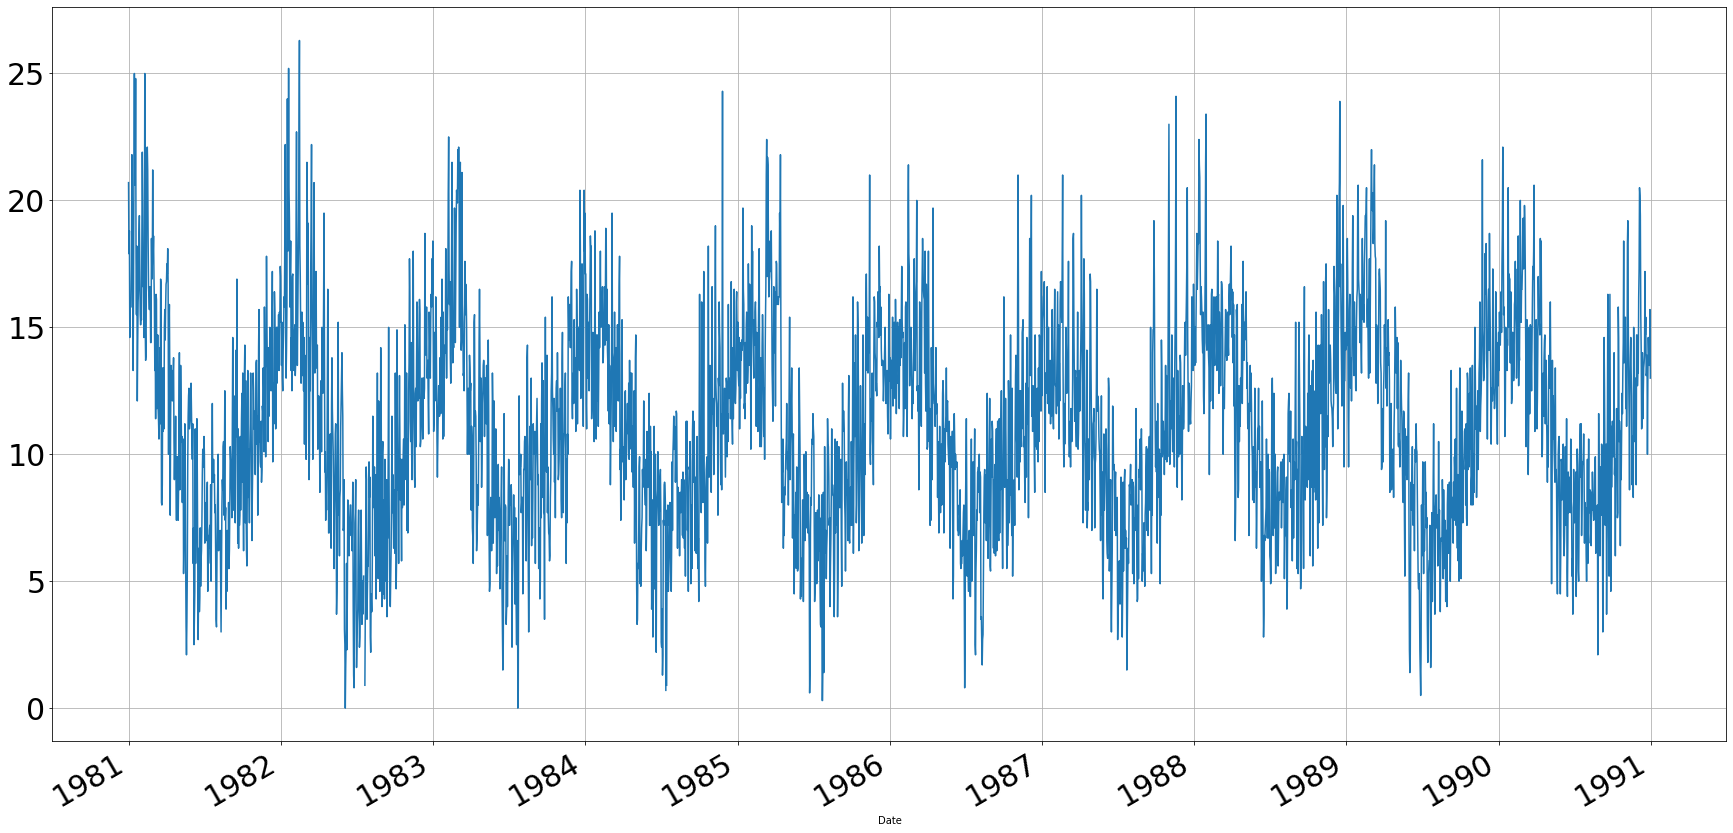

In [12]:
#Graph plot
temp['daily_temp'].plot(figsize=(30,15))
#Define axis label size
plt.tick_params(labelsize = 30)
#Generate grid
plt.grid()
plt.show()

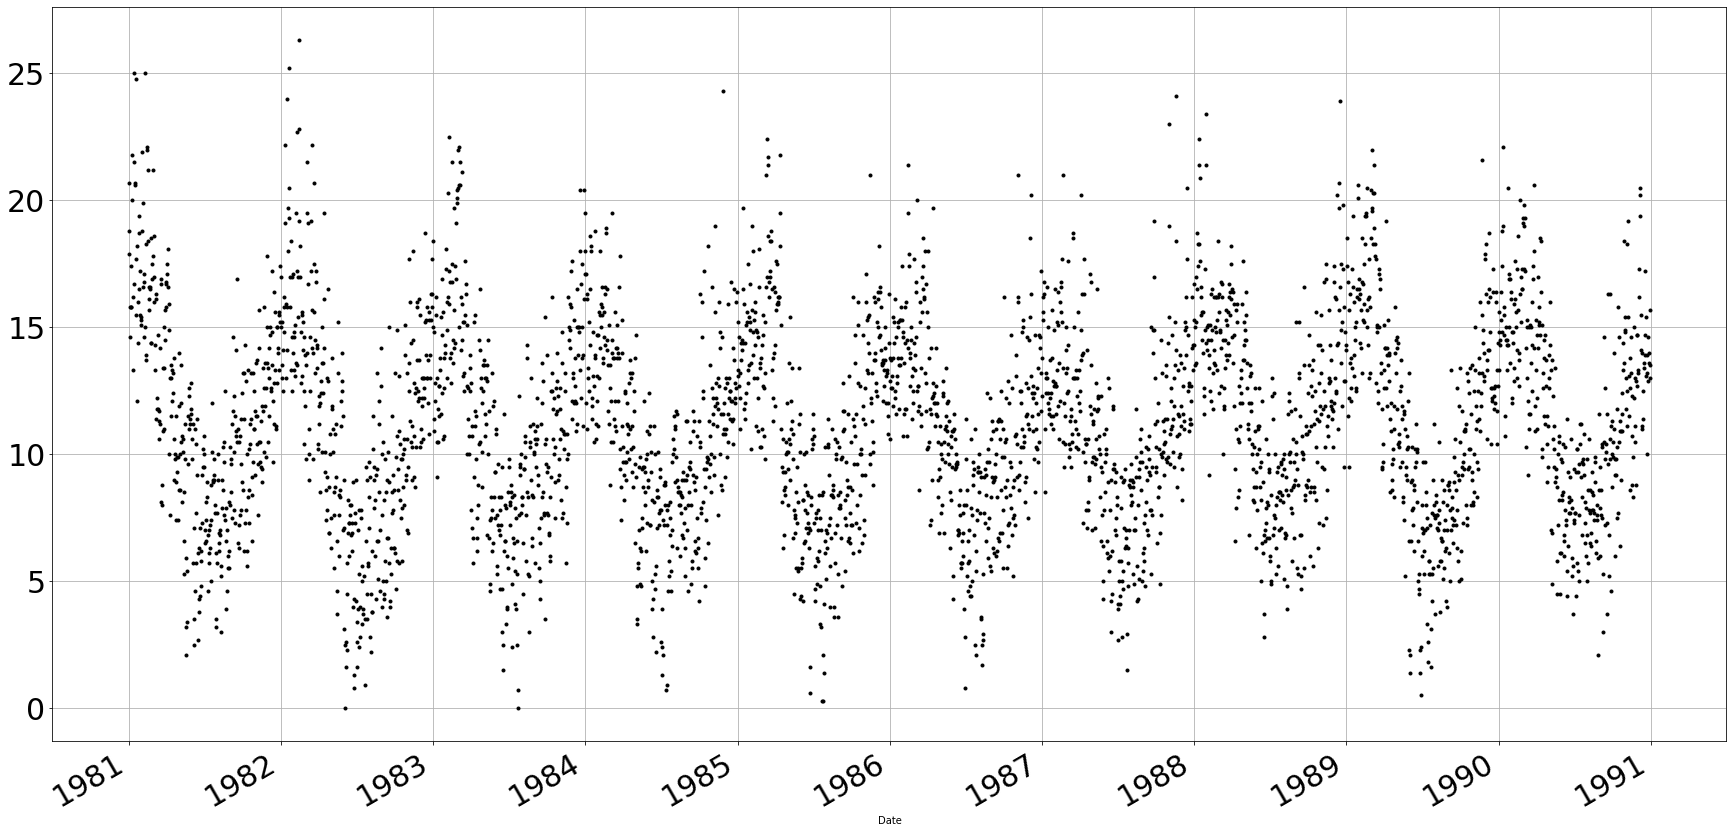

In [13]:
#Graph plot - scatter
temp['daily_temp'].plot(style='k.', figsize=(30,15))
#Define axis label size
plt.tick_params(labelsize = 30)
#Generate grid
plt.grid()
plt.show()

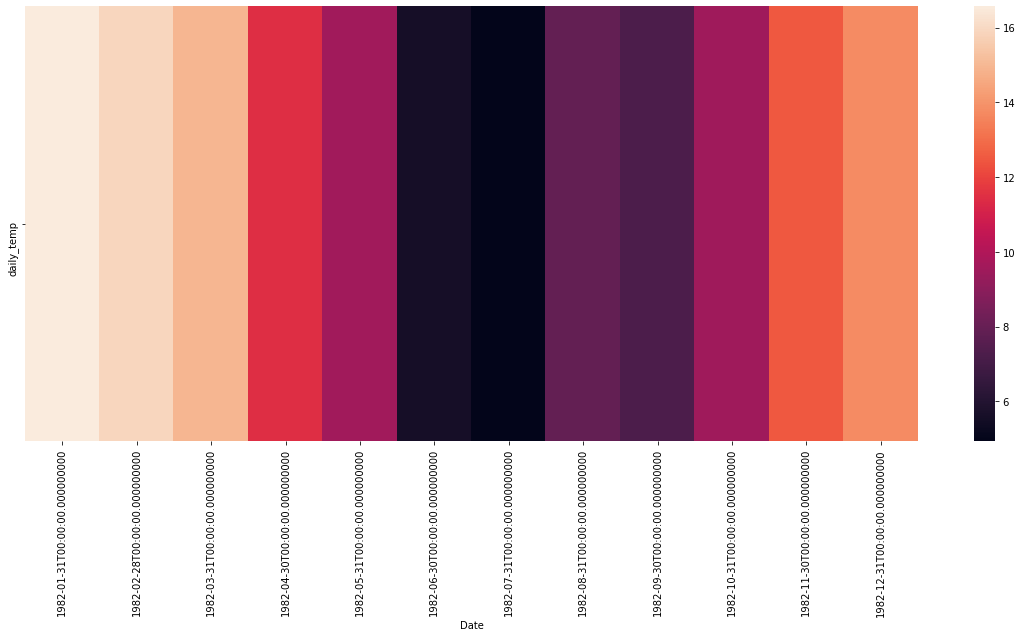

In [14]:
import seaborn as sns
#Let's do a heatmap to see each month's tempature
plt.style.use({'figure.figsize':(20,8)})

#for choose year, we resample by month
temp['1982'].resample('M').mean().T

#using seaborn to graph heatmap
sns.heatmap(temp['1982'].resample('M').mean().T)

In [15]:
#for choose year, we resample by month
temp['1982'].resample('M').mean().T

Date,1982-01-31,1982-02-28,1982-03-31,1982-04-30,1982-05-31,1982-06-30,1982-07-31,1982-08-31,1982-09-30,1982-10-31,1982-11-30,1982-12-31
daily_temp,16.567742,15.921429,14.935484,11.47,9.583871,5.606667,4.927586,7.903226,7.28,9.545161,12.486667,13.754839


### Now, let's extract each year's each day's temp to put into a cell

In [16]:
groups = temp.groupby(pd.Grouper(freq='1Y'))['daily_temp']
groups

In [17]:
from pandas import DataFrame
years = DataFrame()  #instantiate

for name, group in groups:
    years[name.year] = group.values

In [18]:
years

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,20.7,17.0,18.4,19.5,13.3,12.9,12.3,15.3,14.3,14.8
1,17.9,15.0,15.0,17.1,15.2,13.8,13.8,14.3,17.4,13.3
2,18.8,13.5,10.9,17.1,13.1,10.6,15.3,13.5,18.5,15.6
3,14.6,15.2,11.4,12.0,12.7,12.6,15.6,15.0,16.8,14.5
4,15.8,13.0,14.8,11.0,14.6,13.7,16.2,13.6,11.5,14.3
...,...,...,...,...,...,...,...,...,...,...
360,15.5,15.3,13.9,12.2,11.5,14.6,16.2,9.5,13.3,14.0
361,13.3,16.3,11.1,12.0,10.8,14.2,14.2,12.9,11.7,13.6
362,15.6,15.8,16.1,12.6,12.0,13.2,14.3,12.9,10.4,13.5
363,15.2,17.7,20.4,16.0,16.3,11.7,13.3,14.8,14.4,15.7


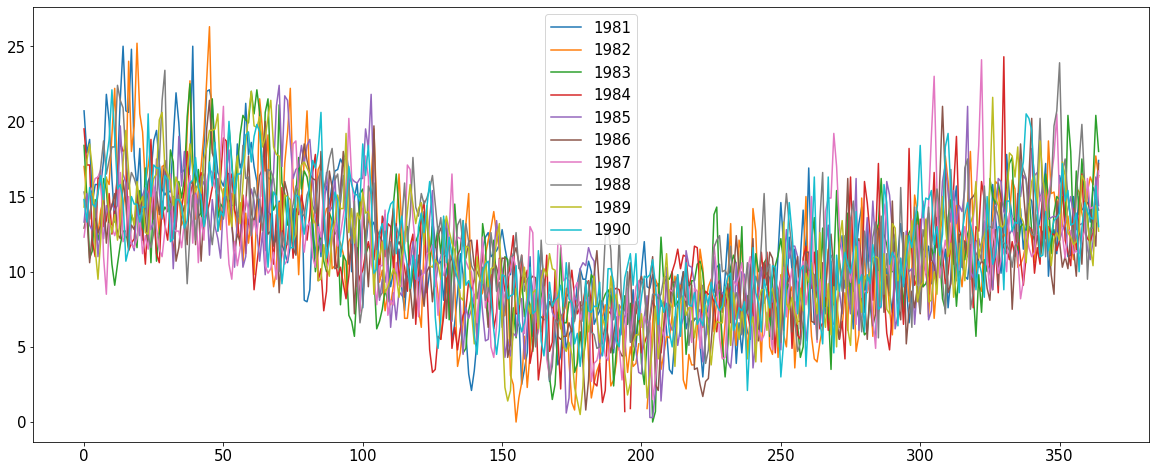

In [19]:
#now we can plot each year's each day temp
years.plot()

plt.legend(fontsize = 15, markerscale = 15)

plt.tick_params(labelsize=15)

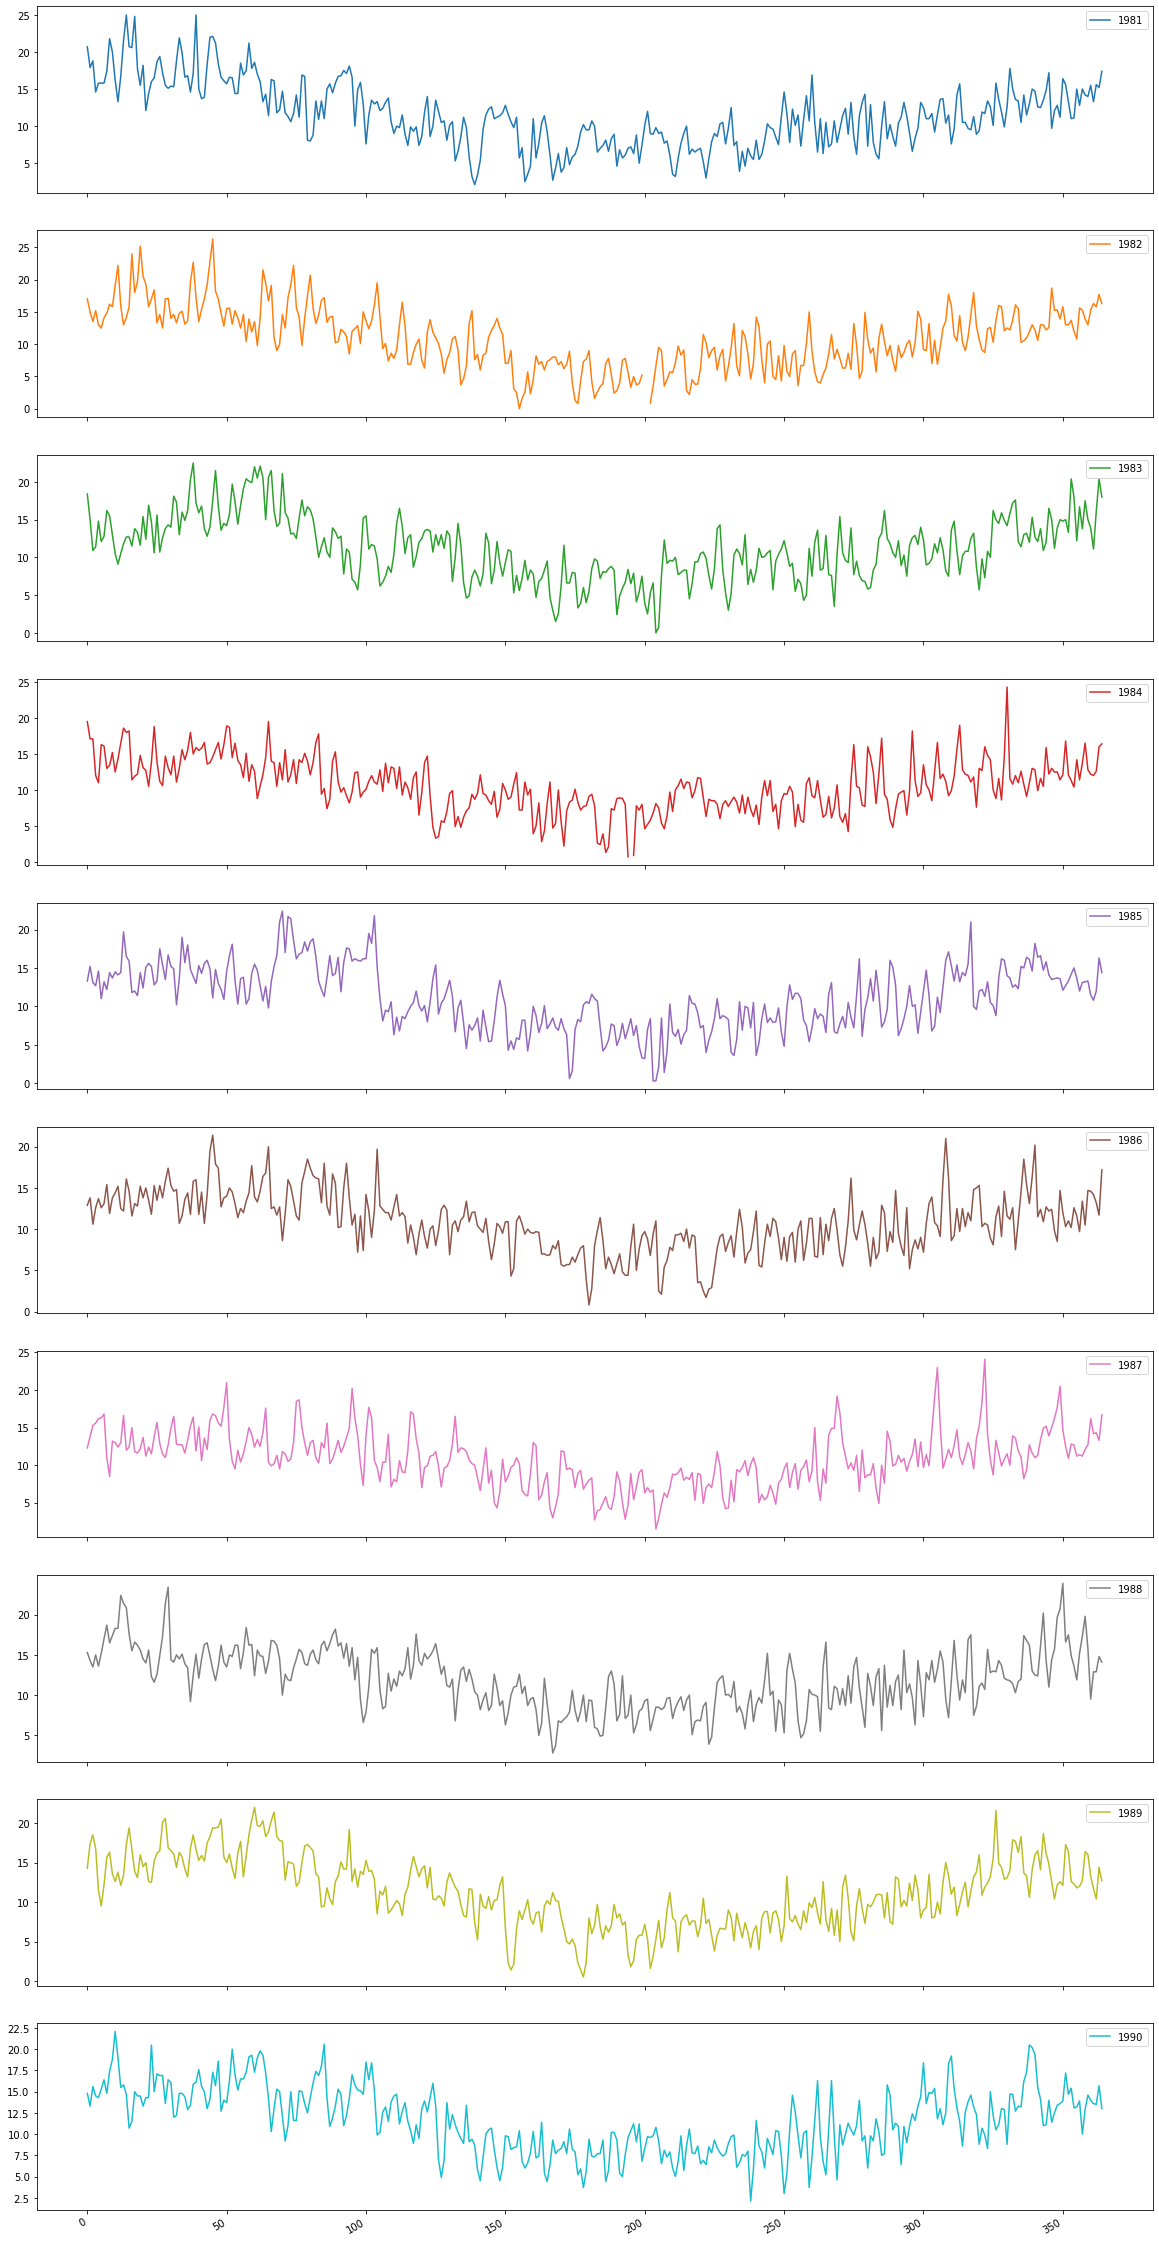

In [20]:
#Seperate it into subplot
years.plot(subplots = True, figsize=(20,45))
plt.show()

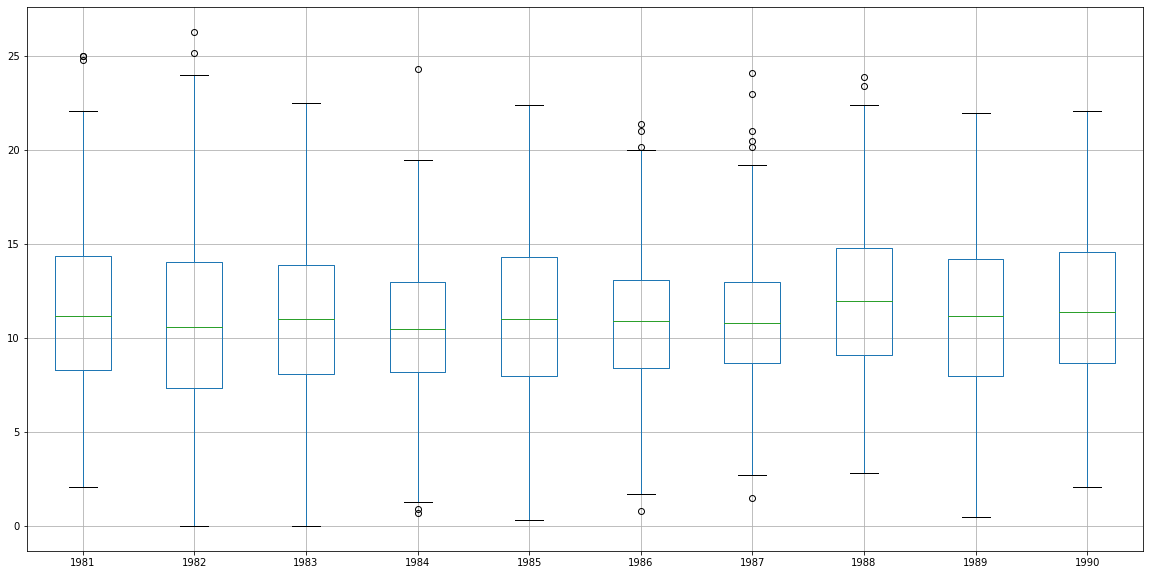

In [21]:
#see box-plot to find mean, median and outlier
years.boxplot(figsize = (20,10))
plt.show()

In [22]:
#define months
groups_month = temp['1985'].groupby(pd.Grouper(freq='1M'))['daily_temp']
months = pd.concat([pd.DataFrame(x[1].values) for x in groups_month], axis=1)
months = pd.DataFrame(months)
months.columns = range(1,13)
months

,1,2,3,4,5,6,7,8,9,10,11,12
0,13.3,14.9,14.3,16.4,9.4,4.3,11.6,7.0,10.3,10.5,7.4,12.3
1,15.2,10.2,15.5,11.9,10.1,5.5,11.0,5.1,7.9,8.6,11.2,15.2
2,13.1,13.6,14.7,15.7,8.0,4.4,10.7,6.3,8.5,7.2,9.2,15.0
3,12.7,19.0,12.7,17.6,10.6,5.9,7.3,6.9,7.9,11.4,12.6,16.4
4,14.6,15.7,10.7,17.5,13.6,5.7,4.2,11.4,8.0,16.2,16.0,16.1
5,11.0,18.0,12.6,15.9,15.4,8.2,4.7,10.4,9.8,6.1,17.1,14.6
6,13.2,14.8,9.8,16.2,9.0,8.2,5.6,10.3,6.7,9.6,15.3,18.2
7,12.2,13.9,13.2,16.0,10.4,4.2,7.7,9.2,4.8,11.1,13.3,16.4
8,14.4,13.0,15.2,15.9,11.0,6.5,7.5,7.2,9.9,13.6,15.4,16.6
9,13.7,15.3,16.6,16.2,12.1,10.0,4.9,7.5,12.8,10.7,13.2,14.7


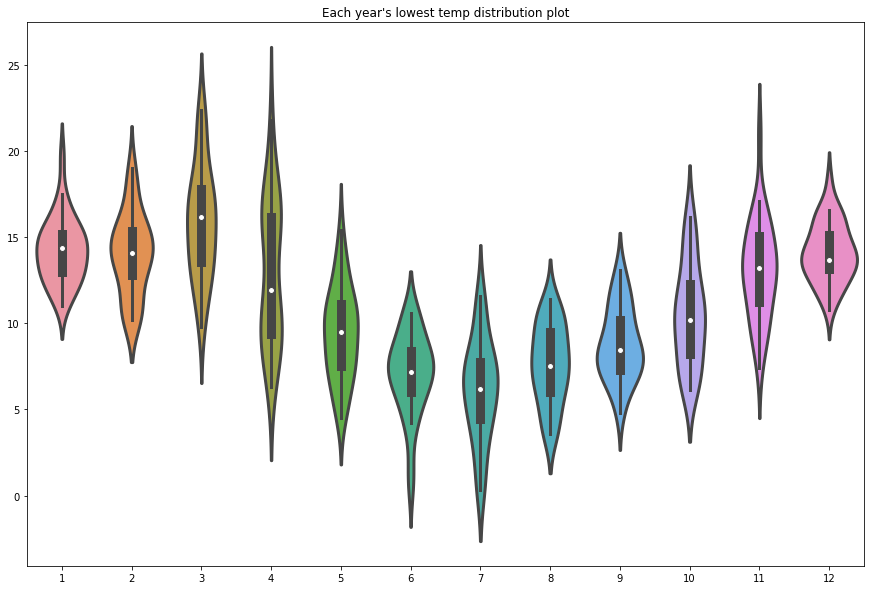

In [23]:
#Violin plot 
plt.style.use({'figure.figsize':(15,10)})

sns.violinplot(data=months)
plt.title("Melbourne Violin Plot")

#linewidth can control the width of each parameters
sns.violinplot(data = months, linewidth=3)
plt.title("Each year's lowest temp distribution plot")
plt.show()

### Lag scatter plot:

Time series analysis assumes a certain relationship(correlate) between an observed value and the previous observed value.

**The observed value before a certain observation value is called the hysteresis value, the observed value before a time step is called the hysteresis phase, the observed value before two time steps is called the hysteresis phase, and so on.**

For example, for the temperature data on August 15, 1982, the temperature on August 14 was the first lag and the temperature on August 13 was the second lag.

The relation between each observed value and its lag value can be represented by a lag scatter graph

Text(0.5, 1.0, 'Melbourne 1980-1990 lowest temp lag 1 plot')

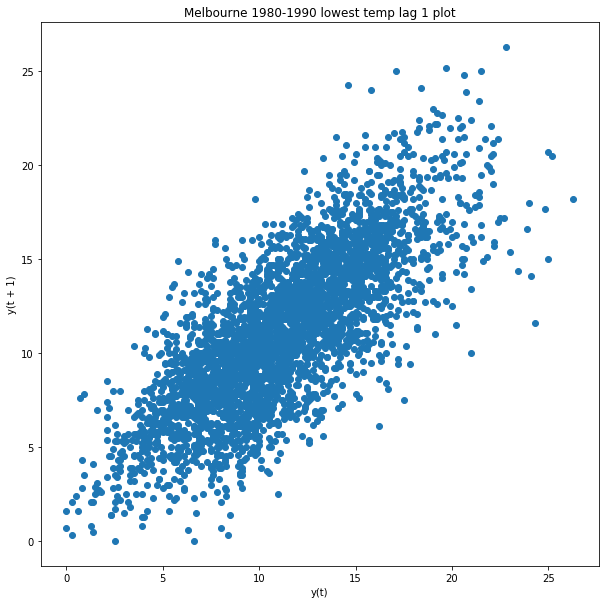

In [24]:
from pandas.plotting import lag_plot

#size
plt.style.use({'figure.figsize':(10,10)})

lag_plot(temp['daily_temp'], lag=1)
plt.title("Melbourne 1980-1990 lowest temp lag 1 plot")

## Make time features for analysis:

To construct information from two dimensions into multiple dimensions:
- which year
- which month
- which day of week
- which day of month
- beginning or end of the month
- which day of year
- which month of year

In [25]:
df = pd.read_csv("melbourne_temp_1.csv")
df['Date'] = pd.to_datetime(df['Date'])
df['daily_temp'] = pd.to_numeric(df['daily_temp'], errors='coerce')
df.head()

,Date,daily_temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [26]:
#insert year feature
df.loc[:,'year'] = df['Date'].apply(lambda x: x.year)

#insert month feature
df.loc[:,'month'] = df['Date'].apply(lambda x: x.month)

#insert day of week feature
df.loc[:,'dow'] = df['Date'].apply(lambda x: x.dayofweek)

#insert day of month feature
df.loc[:,'dom'] = df['Date'].apply(lambda x: x.day)

#insert weekend feature
df.loc[:,'weekend'] = df['Date'].apply(lambda x: x.dayofweek > 4)

#insert Sat and Sun feature
df.loc[:,'Sat'] = df['Date'].apply(lambda x: x.dayofweek == 5)

df.loc[:,'Sun'] = df['Date'].apply(lambda x: x.dayofweek == 6)

In [27]:
#Beginning(1) or end(2) of the month:

def first_half(day):
    if day in range(1, 15):
        return 1
    else:
        return 2

df.loc[:,'half_month'] = df['dom'].apply(lambda x: first_half(x))


#first 10 day, mid 10 day and last 10 day:

def three_part(day):
    if day in range(1,11):
        return 1
    elif day in range(11,21):
        return 2
    else:
        return 3

df.loc[:,'three_part_month'] = df['dom'].apply(lambda x: three_part(x))

In [28]:
#four week feature: which week of the month
def four_week(day):
    if day in range(1,8):
        return 1
    elif day in range(8,15):
        return 2
    elif day in range(15,22):
        return 3
    else:
        return 4

df.loc[:,'four_week_month'] = df['dom'].apply(lambda x: four_week(x))

In [29]:
#define festival feature
df.loc[:, 'festival'] = 0
df.loc[(df.month==1) & (df.dom<4), 'festival'] = 1

In [30]:
df.head()

,Date,daily_temp,year,month,dow,dom,weekend,Sat,Sun,half_month,three_part_month,four_week_month,festival
0,1981-01-01,20.7,1981,1,3,1,False,False,False,1,1,1,1
1,1981-01-02,17.9,1981,1,4,2,False,False,False,1,1,1,1
2,1981-01-03,18.8,1981,1,5,3,True,True,False,1,1,1,1
3,1981-01-04,14.6,1981,1,6,4,True,False,True,1,1,1,0
4,1981-01-05,15.8,1981,1,0,5,False,False,False,1,1,1,0


## Using OneHotEncoding to get dummy

In [31]:
before_dummy_df = df.copy()

#Construct the features of the dataset
drop_columns = ['Date', 'daily_temp']
x_before_dummy = before_dummy_df.drop(drop_columns, axis=1)

#get label
Y = df['daily_temp']

#onehotcoding
columns_to_encoding = ['year', 'month', 'dow', 'dom', 'three_part_month', 'four_week_month']

dummy_X = pd.get_dummies(x_before_dummy, columns=columns_to_encoding)

In [32]:
dummy_X.isnull().sum() > 0

weekend               False
Sat                   False
Sun                   False
half_month            False
festival              False
                      ...  
three_part_month_3    False
four_week_month_1     False
four_week_month_2     False
four_week_month_3     False
four_week_month_4     False
Length: 72, dtype: bool

## Managing Dataset

- Data x_befor_dummy without onehotcoding operation
- Data dummy_X has been get_dummies


Let's try to fit the model by using:
- linear regression
- ridge regression
- decision tree/ RF
- SVM

### 1. Linear-Regression:

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# train_test split
x_train, x_test, y_train, y_test = train_test_split(dummy_X, Y, test_size=0.2, random_state=1, shuffle=True)

In [34]:
y_train = y_train.fillna(y_train.mean())

In [35]:
#Instantiate
lr_reg = LinearRegression()
lr_reg.fit(x_train, y_train)
print('intercept', lr_reg.intercept_)
print('coef', lr_reg.coef_)

intercept 46657281520079.91
coef [ 2.55795654e+12 -2.42666256e+13  4.26217122e+13 -4.07486175e+13
  1.32629395e-01  8.30840742e+12  8.30840742e+12  8.30840742e+12
  8.30840742e+12  8.30840742e+12  8.30840742e+12  8.30840742e+12
  8.30840742e+12  8.30840742e+12  8.30840742e+12  3.90624332e+12
  3.90624332e+12  3.90624332e+12  3.90624332e+12  3.90624332e+12
  3.90624332e+12  3.90624332e+12  3.90624332e+12  3.90624332e+12
  3.90624332e+12  3.90624332e+12  3.90624332e+12  1.14536337e+13
  1.14536337e+13  1.14536337e+13  1.14536337e+13  1.14536337e+13
  3.31623028e+13 -3.37260351e+13 -2.57838566e+10 -2.57838566e+10
 -2.57838566e+10 -2.57838566e+10 -2.57838566e+10 -2.57838566e+10
 -2.57838566e+10  5.38010020e+12  5.38010020e+12  5.38010020e+12
 -2.36248641e+12 -2.36248641e+12 -2.36248641e+12 -2.36248641e+12
  3.21747715e+12  3.21747715e+12  3.21747715e+12  3.21747715e+12
  3.21747715e+12  3.21747715e+12  2.46451059e+12  9.81328303e+11
  9.81328303e+11  9.81328303e+11  9.81328303e+11  9.81328

In [39]:
lr_reg.score(x_test, y_test)

0.5188274909422449

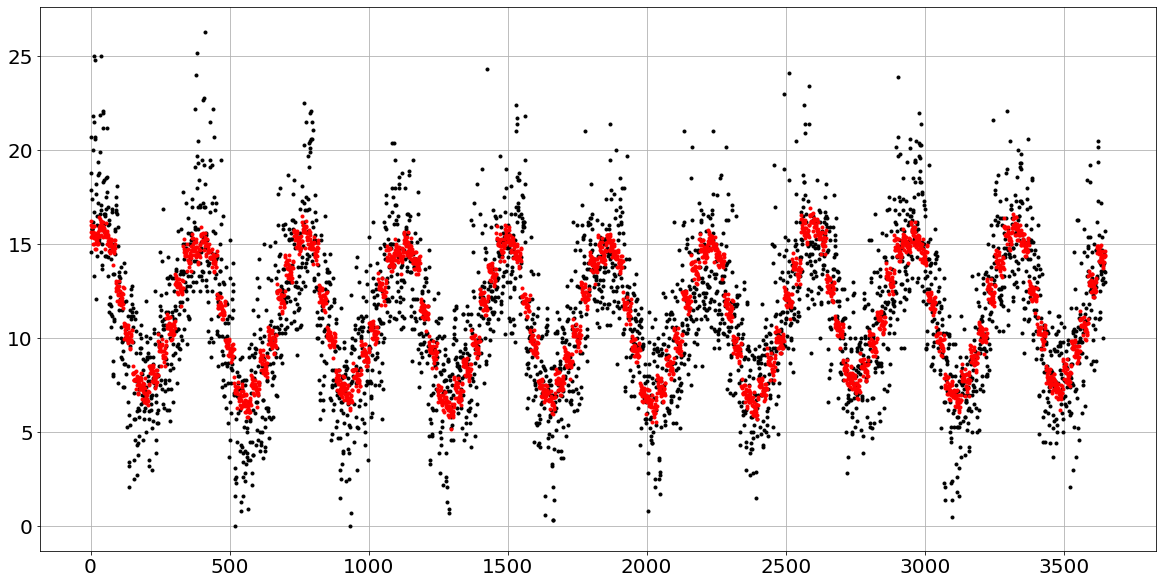

In [36]:
#Let's visualize the fitting plot
df['daily_temp'].plot(style='k.', figsize = (20,10))
df.loc[:, 'lr_reg'] = lr_reg.predict(dummy_X)
plt.plot(df['lr_reg'], 'r.')

#define size
plt.tick_params(labelsize=20)

#get the grid
plt.grid()

### 2.Ridge Regression

In [37]:
from sklearn.linear_model import RidgeCV

#alphas means regularization intensity, and we are going to use 5 folds cross-validation
ridge = RidgeCV(alphas=[0.2, 0.5, 0.8], cv=5)
ridge.fit(x_train, y_train)

ridge.score(x_test, y_test)

0.5212562399581734

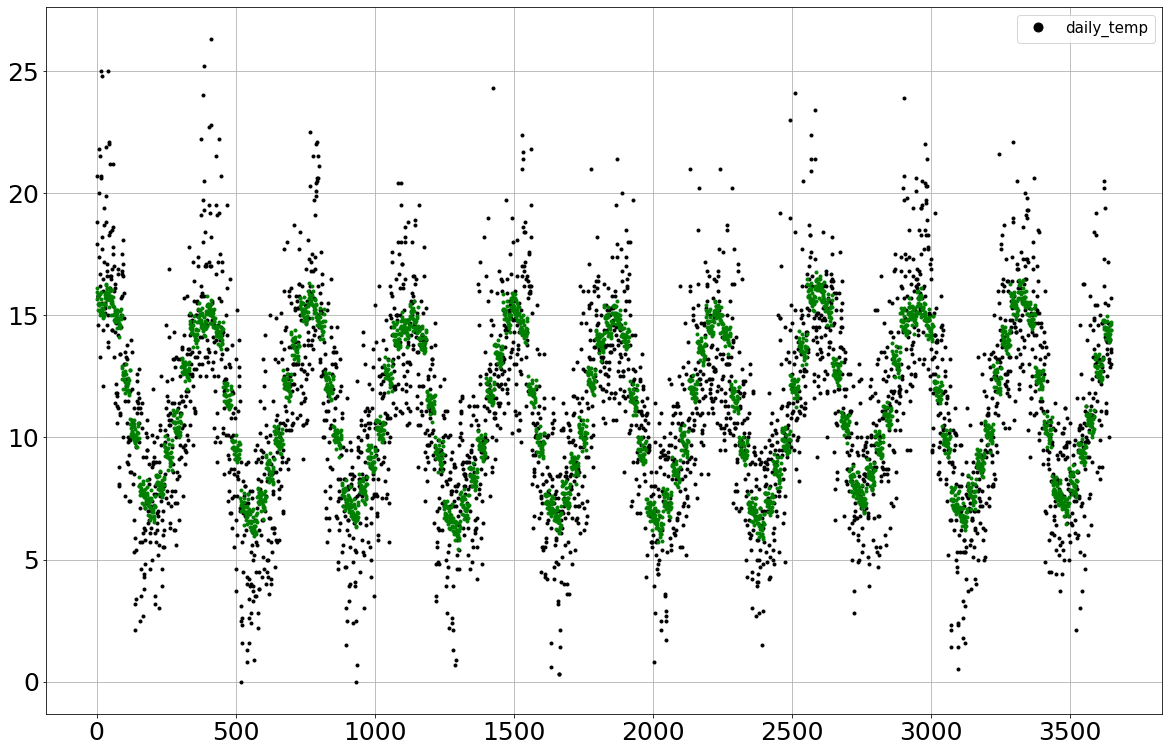

In [38]:
#let's graph
df['daily_temp'].plot(style='k.', figsize=(20,13))

df.loc[:, 'ridge'] = ridge.predict(dummy_X)
plt.plot(df['ridge'], 'g.')

#define size
plt.legend(fontsize=15, markerscale=3)

#axis font size
plt.tick_params(labelsize=25)

#grid 
plt.grid()

### 3.Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid = {'n_estimators': [5, 10, 20, 50, 100, 200],    # how many trees
    'max_depth': [3, 5, 7],   # tree depth
    'max_features': [0.6, 0.7, 0.8, 1]}  # how many features 

rf = RandomForestRegressor()

grid = GridSearchCV(rf, param_grid, cv=5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [43]:
grid.score(x_test, y_test)

0.5364111357526781

In [44]:
grid.best_params_

{'max_depth': 7, 'max_features': 0.7, 'n_estimators': 100}

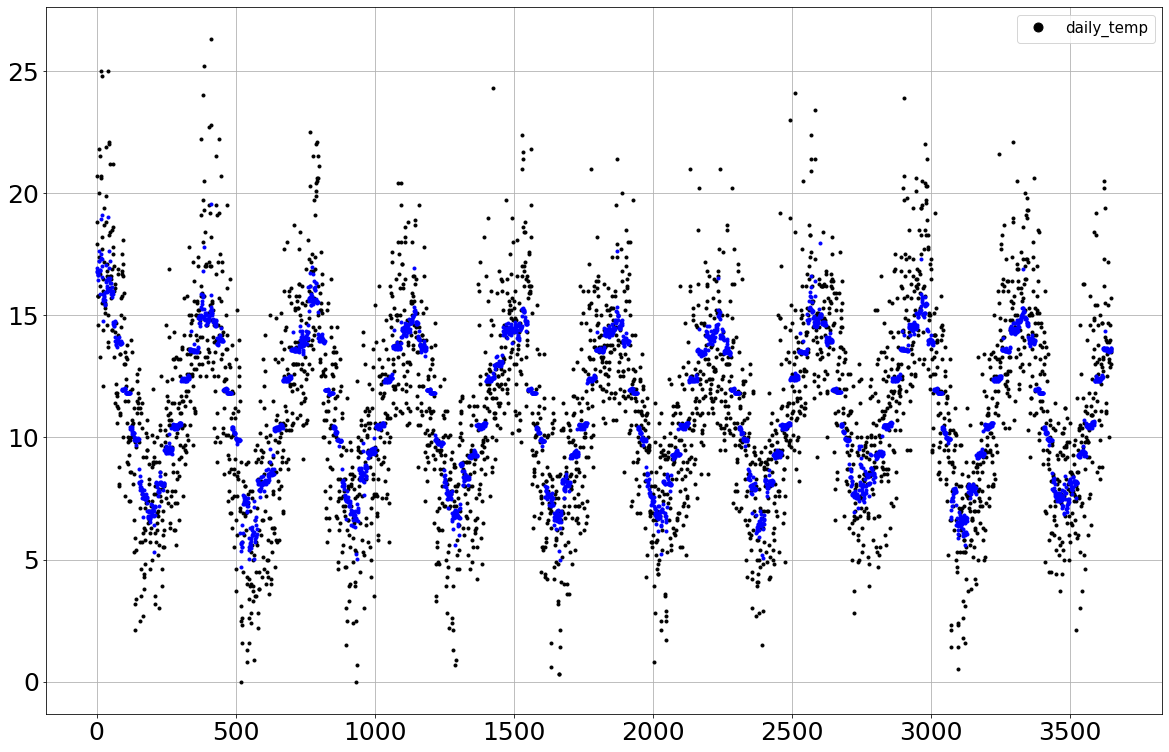

In [54]:
#let's see how random forest fitting the model
df['daily_temp'].plot(style='k.', figsize=(20,13))

df.loc[:, 'rf'] = grid.predict(dummy_X)
plt.plot(df['rf'], 'b.')

#define size
plt.legend(fontsize=15, markerscale=3)

#axis font size
plt.tick_params(labelsize=25)

#grid 
plt.grid()

### 4. SVM(kernel)

In [58]:
from sklearn.svm import SVR

In [68]:
Kernel = ["linear","poly","rbf","sigmoid"]
gamma_range = np.logspace(-10,1,20)

In [69]:
param_grid = {'kernel': ["linear","poly","rbf","sigmoid"]
                ,'gamma': gamma_range
                }

grid_svr = GridSearchCV(SVR(degree=1,cache_size=5000), 
                    param_grid=param_grid, cv=5)
grid_svr.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=5000, coef0=0.0, degree=1,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': array([1.00000000e-10, 3.79269019e-10, 1.43844989e-09, 5.45559478e-09,
       2.06913808e-08, 7.84759970e-08, 2.97635144e-07, 1.12883789e-06,
       4.28133240e-06, 1.62377674e-05, 6.15848211e-05, 2.33572147e-04,
       8.85866790e-04, 3.35981829e-03, 1.27427499e-02, 4.83293024e-02,
       1.83298071e-01, 6.95192796e-01, 2.63665090e+00, 1.00000000e+01]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [70]:
grid_svr.best_params_

{'gamma': 0.6951927961775619, 'kernel': 'poly'}

In [71]:
grid_svr.score(x_test, y_test)

0.5150750155905188

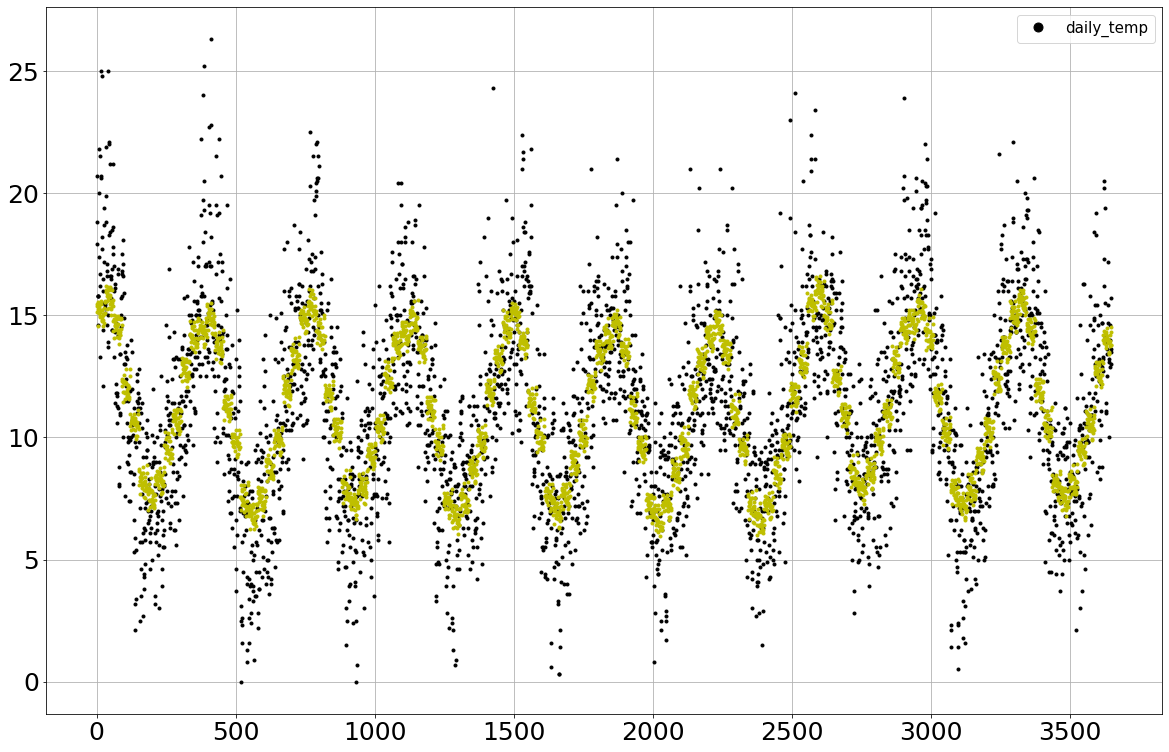

In [72]:
#Let's graph the plot for SVM
df['daily_temp'].plot(style='k.', figsize=(20,13))

df.loc[:,'grid_svr'] = grid_svr.predict(dummy_X)
plt.plot(df['grid_svr'], 'y.')

#define size
plt.legend(fontsize=15, markerscale=3)
plt.tick_params(labelsize = 25)

#grid 
plt.grid()